In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
OUTPUT_dir = '/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace/STORAGE'
Inpb_dir = OUTPUT_dir + '/prior'
Inpa_dir = OUTPUT_dir + '/posterior'
Inpn_files =  ['/Volumes/Elements SE/roms4dvar_ecs/freerun_detide/ocean_ecsdtd_avg_'\
             +str(i).rjust(4,'0')+'.nc' for i in range(289,293)]






In [3]:
Inpb_ds = xr.open_mfdataset(Inpb_dir+'/ocean_ecs_fwd*.nc',combine='nested',\
                            coords='minimal',compat='override',concat_dim='ocean_time',\
                            data_vars=['temp','salt','u','v','zeta'],parallel=True)

Inpa_ds = xr.open_mfdataset(Inpa_dir+'/ocean_ecs_fwd*.nc',combine='nested',\
                            coords='minimal',compat='override',concat_dim='ocean_time',\
                            data_vars=['temp','salt','u','v','zeta'],parallel=True)

Inpn_ds = xr.open_mfdataset(Inpn_files,combine='nested',\
                            coords='minimal',compat='override',concat_dim='ocean_time',\
                            data_vars=['temp','salt','u','v','zeta'],parallel=True)




In [5]:
Inpa_ds

<xarray.Dataset>
Dimensions:         (tracer: 2, Nstate: 11, boundary: 4, s_rho: 20, s_w: 21, Nuser: 1, eta_rho: 362, xi_rho: 242, eta_u: 362, xi_u: 241, eta_v: 361, xi_v: 242, eta_psi: 361, xi_psi: 241, ocean_time: 735, obc_adjust: 17, IorJ: 362)
Coordinates:
  * s_rho           (s_rho) float64 -0.975 -0.925 -0.875 ... -0.075 -0.025
  * s_w             (s_w) float64 -1.0 -0.95 -0.9 -0.85 ... -0.15 -0.1 -0.05 0.0
    lon_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(362, 242), meta=np.ndarray>
    lat_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(362, 242), meta=np.ndarray>
    lon_u           (eta_u, xi_u) float64 dask.array<chunksize=(362, 241), meta=np.ndarray>
    lat_u           (eta_u, xi_u) float64 dask.array<chunksize=(362, 241), meta=np.ndarray>
    lon_v           (eta_v, xi_v) float64 dask.array<chunksize=(361, 242), meta=np.ndarray>
    lat_v           (eta_v, xi_v) float64 dask.array<chunksize=(361, 242), meta=np.ndarray>
    lon_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(361, 241), meta=np.ndarray>
    lat_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(361, 241), meta=np.ndarray>
  * ocean_time      (ocean_time) datetime64[ns] 2017-01-03 ... 2017-02-02
Dimensions without coordinates: tracer, Nstate, boundary, Nuser, eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi, obc_adjust, IorJ
Data variables: (12/146)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    AKt             (ocean_time, s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 21, 362, 242), meta=np.ndarray>
    AKs             (ocean_time, s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 21, 362, 242), meta=np.ndarray>
    shflux          (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 362, 242), meta=np.ndarray>
    ssflux          (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 362, 242), meta=np.ndarray>
    sustr           (ocean_time, eta_u, xi_u) float64 dask.array<chunksize=(49, 362, 241), meta=np.ndarray>
    svstr           (ocean_time, eta_v, xi_v) float64 dask.array<chunksize=(49, 361, 242), meta=np.ndarray>
Attributes: (12/49)
    file:              ocean_ecs_fwd_17169_outer1.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             ROMS_ECS_I4DVAR_ONLYSST
    var_info:          /home/rongzr/ygli/roms_ecs/4dvar/workspace/External/va...
    ...                ...
    compiler_command:  /home/SystemSoftware/intel2017/compilers_and_libraries...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            010x012
    history:           ROMS/TOMS, Version 4.1, Friday - March 8, 2024 - 10:10...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       I4DVAR_ECS, ADD_FSOBC, ADD_M2OBC, ADJOINT, ADJUST_BOUN...

In [11]:
a = Inpb_ds.ocean_time.data.astype('float64')/86400*1e-9


In [25]:
Inpb_cre = Inpb_ds.sel(eta_rho=slice(70,220),xi_rho=slice(15,150),\
                       eta_u=slice(70,220),xi_u=slice(15,150),\
                       eta_v=slice(70,220),xi_v=slice(15,150));
Inpb_cre = Inpb_cre.sel(ocean_time=slice('2017-01-03','2017-02-02'))




In [7]:
Inpb_cre.u

<xarray.DataArray 'u' (ocean_time: 735, s_rho: 20, eta_u: 362, xi_u: 241)>
dask.array<concatenate, shape=(735, 20, 362, 241), dtype=float64, chunksize=(49, 20, 362, 241), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.975 -0.925 -0.875 ... -0.125 -0.075 -0.025
    lon_u       (eta_u, xi_u) float64 dask.array<chunksize=(362, 241), meta=np.ndarray>
    lat_u       (eta_u, xi_u) float64 dask.array<chunksize=(362, 241), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2017-01-03 ... 2017-02-02
Dimensions without coordinates: eta_u, xi_u
Attributes:
    standard_name:  sea_water_x_velocity
    long_name:      u-momentum component
    units:          meter second-1
    time:           ocean_time
    cell_methods:   ocean_time: point
    grid:           grid
    location:       edge1
    field:          u-velocity

In [ ]:
sio.savemat('Inpb_cre_nonud.mat',{'rlon_cre':Inpb_cre.lon_rho.data.compute(),\
                                  'rlat_cre':Inpb_cre.lat_rho.data.compute(),\
                                  'zeta':Inpb_cre.zeta.data.compute(),\
                                  'temp':Inpb_cre.temp.data.compute(), 'salt':Inpb_cre.salt.data.compute(),\
                                  'u':Inpb_cre.u.data.compute(),'v':Inpb_cre.v.data.compute()})

In [22]:
Inpb_cre.zeta.data.compute().shape

(735, 120, 135)

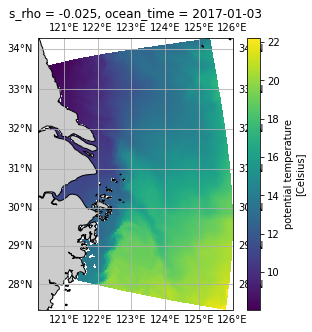

In [ ]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=proj)
Inpb_cre.temp.isel(s_rho = -1,ocean_time = 0).plot(x="lon_rho",y = "lat_rho",transform=ccrs.PlateCarree())
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.8"
)
ax.add_feature(coast_10m)
ax.gridlines(draw_labels=True)

In [68]:
Inpb_ys = Inpb_ds.sel(eta_rho=slice(220,305),xi_rho=slice(105,200),\
                       eta_u=slice(220,305),xi_u=slice(105,200),\
                       eta_v=slice(220,305),xi_v=slice(105,200));
Inpb_ys = Inpb_ys.sel(ocean_time=slice('2017-01-03','2017-02-02'))

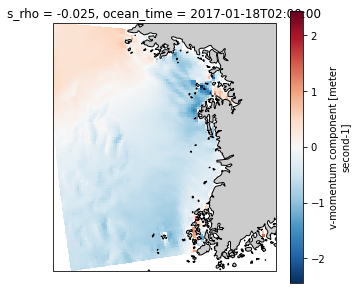

In [94]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=proj)
Inpb_ys.v.isel(s_rho = -1,ocean_time = 15*24+9).plot(x="lon_v",y = "lat_v",transform=ccrs.PlateCarree())
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.8"
)
ax.add_feature(coast_10m)

In [95]:
Inpb_ys.v.isel(s_rho = -1,ocean_time = 15*24+9).mean().data.compute()

-0.3108576664807046

In [74]:
Inpn_ys = Inpn_ds.sel(eta_rho=slice(220,305),xi_rho=slice(105,200),\
                       eta_u=slice(220,305),xi_u=slice(105,200),\
                       eta_v=slice(220,305),xi_v=slice(105,200));
Inpn_ys = Inpn_ys.sel(ocean_time=slice('2017-01-03','2017-02-02'))

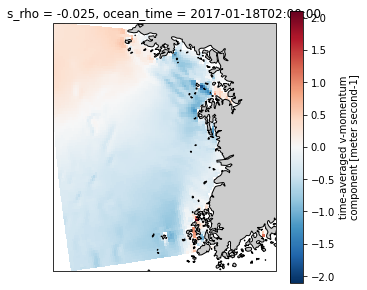

In [93]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=proj)
Inpn_ys.v.isel(s_rho = -1,ocean_time = 90).plot(x="lon_v",y = "lat_v",transform=ccrs.PlateCarree())
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.8"
)
ax.add_feature(coast_10m)

In [96]:
Inpn_ys.v.isel(s_rho = -1,ocean_time = 90).mean().data.compute()

-0.2577561

In [27]:
Inpb_bh = Inpb_ds.sel(eta_rho=slice(280,360),xi_rho=slice(0,80),\
                       eta_u=slice(280,360),xi_u=slice(0,80),\
                       eta_v=slice(280,360),xi_v=slice(0,80));
Inpb_bh = Inpb_bh.sel(ocean_time=slice('2017-01-03','2017-02-02'))

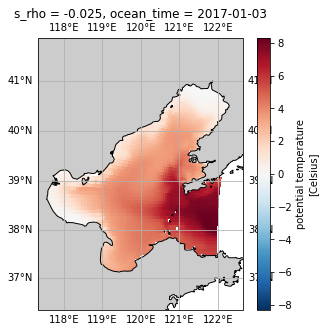

In [28]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=proj)
Inpb_bh.temp.isel(s_rho = -1,ocean_time = 0).plot(x="lon_rho",y = "lat_rho",transform=ccrs.PlateCarree())
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.8"
)
ax.add_feature(coast_10m)
ax.gridlines(draw_labels=True)

In [8]:
Inpb_ks = Inpb_ds.sel(eta_rho=slice(10,120),xi_rho=slice(160,230),\
                       eta_u=slice(10,120),xi_u=slice(160,230),\
                       eta_v=slice(10,120),xi_v=slice(160,230));
Inpb_ks = Inpb_ks.sel(ocean_time=slice('2017-01-03','2017-02-02'))

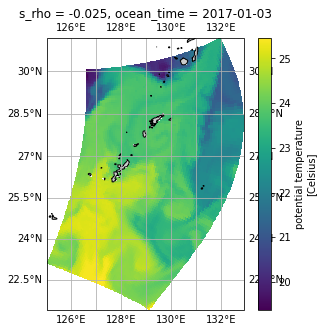

In [9]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=proj)
Inpb_ks.temp.isel(s_rho = -1,ocean_time = 0).plot(x="lon_rho",y = "lat_rho",transform=ccrs.PlateCarree())
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.8"
)
ax.add_feature(coast_10m)
ax.gridlines(draw_labels=True)

In [5]:

tempb_cre = Inpb_ds.temp.sel(s_rho=-0.025,eta_rho=slice(80,200),xi_rho=slice(15,150));
tempb_cre = tempb_cre.sel(ocean_time=slice('2017-01-03','2017-02-02'))
# proj = ccrs.Mercator()
# fig = plt.figure(figsize=(5, 5))
# ax = plt.axes(projection=proj)
# tempb_cre.isel(ocean_time = 20).plot(x="lon_rho",y = "lat_rho",transform=ccrs.PlateCarree())
# coast_10m = cfeature.NaturalEarthFeature(
#     "physical", "land", "10m", edgecolor="k", facecolor="0.8"
# )
# ax.add_feature(coast_10m)
# tempa1d = Inpa_ds.temp.isel(s_rho=-1,eta_rho=[165,260,100,320],xi_rho=[70,150,175,40]); tempa1d = tempa1d.sel(ocean_time=slice('2017-01-03','2017-02-01'))
# tempn1d = Inpn_ds.temp.isel(s_rho=-1,eta_rho=[165,260,100,320],xi_rho=[70,150,175,40]); tempn1d = tempn1d.sel(ocean_time=slice('2017-01-03','2017-02-01'))

In [24]:
Inpa_cre = Inpb_ds.sel(eta_rho=slice(80,200),xi_rho=slice(15,150));
Inpa_cre = Inpa_cre.sel(ocean_time=slice('2017-01-03','2017-02-02'))
Inpa_cre


<xarray.Dataset>
Dimensions:         (tracer: 2, Nstate: 11, boundary: 4, s_rho: 20, s_w: 21, Nuser: 1, eta_rho: 120, xi_rho: 135, eta_u: 362, xi_u: 241, eta_v: 361, xi_v: 242, eta_psi: 361, xi_psi: 241, ocean_time: 735, obc_adjust: 17, IorJ: 362)
Coordinates:
  * s_rho           (s_rho) float64 -0.975 -0.925 -0.875 ... -0.075 -0.025
  * s_w             (s_w) float64 -1.0 -0.95 -0.9 -0.85 ... -0.15 -0.1 -0.05 0.0
    lon_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lat_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lon_u           (eta_u, xi_u) float64 dask.array<chunksize=(362, 241), meta=np.ndarray>
    lat_u           (eta_u, xi_u) float64 dask.array<chunksize=(362, 241), meta=np.ndarray>
    lon_v           (eta_v, xi_v) float64 dask.array<chunksize=(361, 242), meta=np.ndarray>
    lat_v           (eta_v, xi_v) float64 dask.array<chunksize=(361, 242), meta=np.ndarray>
    lon_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(361, 241), meta=np.ndarray>
    lat_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(361, 241), meta=np.ndarray>
  * ocean_time      (ocean_time) datetime64[ns] 2017-01-03 ... 2017-02-02
Dimensions without coordinates: tracer, Nstate, boundary, Nuser, eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi, obc_adjust, IorJ
Data variables: (12/146)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    AKt             (ocean_time, s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 21, 120, 135), meta=np.ndarray>
    AKs             (ocean_time, s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 21, 120, 135), meta=np.ndarray>
    shflux          (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 120, 135), meta=np.ndarray>
    ssflux          (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 120, 135), meta=np.ndarray>
    sustr           (ocean_time, eta_u, xi_u) float64 dask.array<chunksize=(49, 362, 241), meta=np.ndarray>
    svstr           (ocean_time, eta_v, xi_v) float64 dask.array<chunksize=(49, 361, 242), meta=np.ndarray>
Attributes: (12/49)
    file:              ocean_ecs_fwd_17169_outer0.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             ROMS_ECS_I4DVAR_ONLYSST
    var_info:          /home/rongzr/ygli/roms_ecs/4dvar/workspace/External/va...
    ...                ...
    compiler_command:  /home/SystemSoftware/intel2017/compilers_and_libraries...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            010x012
    history:           ROMS/TOMS, Version 4.1, Friday - March 8, 2024 - 10:10...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       I4DVAR_ECS, ADD_FSOBC, ADD_M2OBC, ADJOINT, ADJUST_BOUN...

In [ ]:
sio.savemat('Inpa_cre_nonud.mat',{'rlon_cre':Inpa_cre.lon_rho.data.compute(),\
                                  'rlat_cre':Inpa_cre.lat_rho.data.compute(),\
                                  'zeta':Inpa_cre.zeta.data.compute(),\
                                  'temp':Inpa_cre.temp.data.compute(), 'salt':Inpa_cre.salt.data.compute(),\
                                  'u':Inpa_cre.u.data.compute(),'v':Inpa_cre.v.data.compute()})

In [8]:
tempa_cre = Inpa_ds.temp.sel(s_rho=-0.025,eta_rho=slice(80,200),xi_rho=slice(15,150));
tempa_cre = tempa_cre.sel(ocean_time=slice('2017-01-03','2017-02-02'))

# proj = ccrs.Mercator()
# fig = plt.figure(figsize=(5, 5))
# ax = plt.axes(projection=proj)
# tempa_cre.isel(ocean_time = 20).plot(x="lon_rho",y = "lat_rho",transform=ccrs.PlateCarree())
# coast_10m = cfeature.NaturalEarthFeature(
#     "physical", "land", "10m", edgecolor="k", facecolor="0.8"
# )
# ax.add_feature(coast_10m)

<xarray.DataArray 'temp' (ocean_time: 184, eta_rho: 120, xi_rho: 135)>
dask.array<getitem, shape=(184, 120, 135), dtype=float64, chunksize=(13, 120, 135), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.025
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2017-01-03T02:00:00 ... 2017-02-02
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      potential temperature
    units:          Celsius
    time:           ocean_time
    cell_methods:   ocean_time: point
    grid:           grid
    location:       face
    field:          temperature

In [ ]:
Inpn_cre = Inpn_ds.sel(eta_rho=slice(80,200),xi_rho=slice(15,150));
Inpn_cre = Inpn_cre.sel(ocean_time=slice('2017-01-03','2017-02-02'))
Inpn_cre


In [ ]:
sio.savemat('Inpn_cre_nonud.mat',{'rlon_cre':Inpn_cre.lon_rho.data.compute(),\
                                  'rlat_cre':Inpn_cre.lat_rho.data.compute(),\
                                  'zeta':Inpn_cre.zeta.data.compute(),\
                                  'temp':Inpn_cre.temp.data.compute(), 'salt':Inpn_cre.salt.data.compute(),\
                                  'u':Inpn_cre.u.data.compute(),'v':Inpn_cre.v.data.comput()})

In [11]:
tempn_cre = Inpn_ds.temp.sel(s_rho=-0.025,eta_rho=slice(80,200),xi_rho=slice(15,150));
tempn_cre = tempn_cre.sel(ocean_time=slice('2017-01-03','2017-02-01'))
tempn_cre


# proj = ccrs.Mercator()
# fig = plt.figure(figsize=(5, 5))
# ax = plt.axes(projection=proj)
# tempn_cre.isel(ocean_time = 20).plot(x="lon_rho",y = "lat_rho",transform=ccrs.PlateCarree())
# coast_10m = cfeature.NaturalEarthFeature(
#     "physical", "land", "10m", edgecolor="k", facecolor="0.8"
# )
# ax.add_feature(coast_10m)

<xarray.DataArray 'temp' (ocean_time: 180, eta_rho: 120, xi_rho: 135)>
dask.array<getitem, shape=(180, 120, 135), dtype=float32, chunksize=(100, 120, 135), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.025
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2017-01-03T02:00:00 ... 2017-02-0...
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  time-averaged potential temperature
    units:      Celsius
    time:       ocean_time
    field:      temperature, scalar, series

In [8]:
tempn_cre.ocean_time

<xarray.DataArray 'ocean_time' (ocean_time: 180)>
array(['2017-01-03T02:00:00.000000000', '2017-01-03T06:00:00.000000000',
       '2017-01-03T10:00:00.000000000', '2017-01-03T14:00:00.000000000',
       '2017-01-03T18:00:00.000000000', '2017-01-03T22:00:00.000000000',
       '2017-01-04T02:00:00.000000000', '2017-01-04T06:00:00.000000000',
       '2017-01-04T10:00:00.000000000', '2017-01-04T14:00:00.000000000',
       '2017-01-04T18:00:00.000000000', '2017-01-04T22:00:00.000000000',
       '2017-01-05T02:00:00.000000000', '2017-01-05T06:00:00.000000000',
       '2017-01-05T10:00:00.000000000', '2017-01-05T14:00:00.000000000',
       '2017-01-05T18:00:00.000000000', '2017-01-05T22:00:00.000000000',
       '2017-01-06T02:00:00.000000000', '2017-01-06T06:00:00.000000000',
       '2017-01-06T10:00:00.000000000', '2017-01-06T14:00:00.000000000',
       '2017-01-06T18:00:00.000000000', '2017-01-06T22:00:00.000000000',
       '2017-01-07T02:00:00.000000000', '2017-01-07T06:00:00.000000000',
       '2017-01-07T10:00:00.000000000', '2017-01-07T14:00:00.000000000',
       '2017-01-07T18:00:00.000000000', '2017-01-07T22:00:00.000000000',
       '2017-01-08T02:00:00.000000000', '2017-01-08T06:00:00.000000000',
       '2017-01-08T10:00:00.000000000', '2017-01-08T14:00:00.000000000',
       '2017-01-08T18:00:00.000000000', '2017-01-08T22:00:00.000000000',
       '2017-01-09T02:00:00.000000000', '2017-01-09T06:00:00.000000000',
       '2017-01-09T10:00:00.000000000', '2017-01-09T14:00:00.000000000',
       '2017-01-09T18:00:00.000000000', '2017-01-09T22:00:00.000000000',
       '2017-01-10T02:00:00.000000000', '2017-01-10T06:00:00.000000000',
       '2017-01-10T10:00:00.000000000', '2017-01-10T14:00:00.000000000',
       '2017-01-10T18:00:00.000000000', '2017-01-10T22:00:00.000000000',
       '2017-01-11T02:00:00.000000000', '2017-01-11T06:00:00.000000000',
       '2017-01-11T10:00:00.000000000', '2017-01-11T14:00:00.000000000',
       '2017-01-11T18:00:00.000000000', '2017-01-11T22:00:00.000000000',
       '2017-01-12T02:00:00.000000000', '2017-01-12T06:00:00.000000000',
       '2017-01-12T10:00:00.000000000', '2017-01-12T14:00:00.000000000',
       '2017-01-12T18:00:00.000000000', '2017-01-12T22:00:00.000000000',
       '2017-01-13T02:00:00.000000000', '2017-01-13T06:00:00.000000000',
       '2017-01-13T10:00:00.000000000', '2017-01-13T14:00:00.000000000',
       '2017-01-13T18:00:00.000000000', '2017-01-13T22:00:00.000000000',
       '2017-01-14T02:00:00.000000000', '2017-01-14T06:00:00.000000000',
       '2017-01-14T10:00:00.000000000', '2017-01-14T14:00:00.000000000',
       '2017-01-14T18:00:00.000000000', '2017-01-14T22:00:00.000000000',
       '2017-01-15T02:00:00.000000000', '2017-01-15T06:00:00.000000000',
       '2017-01-15T10:00:00.000000000', '2017-01-15T14:00:00.000000000',
       '2017-01-15T18:00:00.000000000', '2017-01-15T22:00:00.000000000',
       '2017-01-16T02:00:00.000000000', '2017-01-16T06:00:00.000000000',
       '2017-01-16T10:00:00.000000000', '2017-01-16T14:00:00.000000000',
       '2017-01-16T18:00:00.000000000', '2017-01-16T22:00:00.000000000',
       '2017-01-17T02:00:00.000000000', '2017-01-17T06:00:00.000000000',
       '2017-01-17T10:00:00.000000000', '2017-01-17T14:00:00.000000000',
       '2017-01-17T18:00:00.000000000', '2017-01-17T22:00:00.000000000',
       '2017-01-18T02:00:00.000000000', '2017-01-18T06:00:00.000000000',
       '2017-01-18T10:00:00.000000000', '2017-01-18T14:00:00.000000000',
       '2017-01-18T18:00:00.000000000', '2017-01-18T22:00:00.000000000',
       '2017-01-19T02:00:00.000000000', '2017-01-19T06:00:00.000000000',
       '2017-01-19T10:00:00.000000000', '2017-01-19T14:00:00.000000000',
       '2017-01-19T18:00:00.000000000', '2017-01-19T22:00:00.000000000',
       '2017-01-20T02:00:00.000000000', '2017-01-20T06:00:00.000000000',
       '2017-01-20T10:00:00.000000000', '2017-01-20T14:00:00.000000000',
       '2017-01-20T18:00:00.000000000', '2017-01-20T22:00:00.000000000',
       '

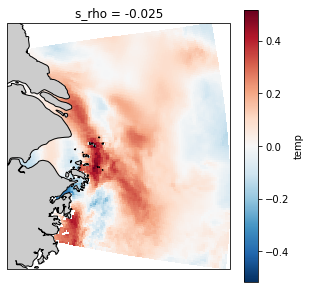

In [10]:
diff_cre = tempa_cre- tempb_cre
proj = ccrs.Mercator()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=proj)
diff_cre.mean(dim="ocean_time").plot(x="lon_rho",y = "lat_rho",transform=ccrs.PlateCarree())
coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.8"
)
ax.add_feature(coast_10m)

In [7]:
tempb_cre_compute = tempb_cre.data.compute()
tempa_cre_compute = tempa_cre.data.compute()

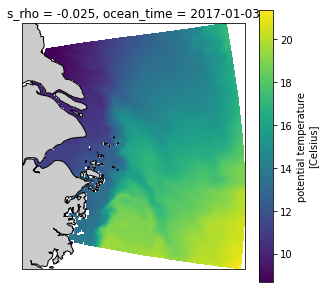

In [140]:
Inpo_ds = xr.open_dataset('/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/ecs_oisst_super_201701_full.nc')
Inpo_ds

In [12]:
  #%%
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import scipy.io as sio

#%%
# assign the target folder name
suffix='nonud'
OUTPUT_dir = '/Volumes/Elements SE/roms4dvar_ecs/i4dvar_outputs/workspace/STORAGE'
Inpb_dir = OUTPUT_dir + '/prior'
Inpa_dir = OUTPUT_dir + '/posterior'
Inpn_files =  ['/Volumes/Elements SE/roms4dvar_ecs/freerun_detide/ocean_ecsdtd_avg_'\
             +str(i).rjust(4,'0')+'.nc' for i in range(289,293)]
# assign the target area
area = 'cre'
FREE_RUN = True
Inpb_prefix = 'Inpb_'+area+'_'+suffix
Inpa_prefix = 'Inpa_'+area+'_'+suffix
Inpn_prefix = 'Inpn_'+area

time_range =slice('2017-01-03','2017-02-02')
if area == 'cre':
    eta_range = slice(80,200)
    xi_range = slice(15,150)

#%%
# build the pointer of multi-ncfiles
Inpb_ds = xr.open_mfdataset(Inpb_dir+'/ocean_ecs_fwd*.nc',combine='nested',\
                            coords='minimal',compat='override',concat_dim='ocean_time',\
                            data_vars=['temp','salt','u','v','zeta'],parallel=True)

Inpa_ds = xr.open_mfdataset(Inpa_dir+'/ocean_ecs_fwd*.nc',combine='nested',\
                            coords='minimal',compat='override',concat_dim='ocean_time',\
                            data_vars=['temp','salt','u','v','zeta'],parallel=True)

Inpn_ds = xr.open_mfdataset(Inpn_files,combine='nested',\
                            coords='minimal',compat='override',concat_dim='ocean_time',\
                            data_vars=['temp','salt','u','v','zeta'],parallel=True)

#%%
# extract from background
Inpb = Inpb_ds.sel(eta_rho=eta_range,xi_rho=xi_range,\
                   eta_u=eta_range,xi_u=xi_range,\
                   eta_v=eta_range,xi_v=xi_range)
Inpb = Inpb.sel(ocean_time=time_range)
rlon = Inpb.lon_rho.data.compute()
rlat = Inpb.lat_rho.data.compute()
ulon = Inpb.lon_u.data.compute()
ulat = Inpb.lat_u.data.compute()
vlon = Inpb.lon_v.data.compute()
vlat = Inpb.lat_v.data.compute()


# save mat file
#sio.savemat(Inpb_mat,{'rlon':Inpb.lon_rho.data.compute(),\
#                                  'rlat':Inpb.lat_rho.data.compute(),\
#                                  'zeta':Inpb.zeta.data.compute(),\
#                                  'temp':Inpb.temp.data.compute(), 'salt':Inpb.salt.data.compute(),\
#                                  'u':Inpb.u.data.compute(),'v':Inpb.v.data.compute()})

#%%
#extract from analysis
Inpa = Inpa_ds.sel(eta_rho=eta_range,xi_rho=xi_range,\
                   eta_u=eta_range,xi_u=xi_range,\
                   eta_v=eta_range,xi_v=xi_range)
Inpa = Inpa.sel(ocean_time=time_range)
timeab = Inpa.ocean_time.data.astype('float64')/86400*1e-9

#save mat file
#sio.savemat(Inpa_mat,{'rlon':Inpa.lon_rho.data.compute(),\
#                                  'rlat':Inpa.lat_rho.data.compute(),\
#                                  'zeta':Inpa.zeta.data.compute(),\
#                                  'temp':Inpa.temp.data.compute(), 'salt':Inpa.salt.data.compute(),\
#                                  'u':Inpa.u.data.compute(),'v':Inpa.v.data.compute()})
#%%
#extract from free fun
#if FREE_RUN:
Inpn = Inpn_ds.sel(eta_rho=eta_range,xi_rho=xi_range,\
                   eta_u=eta_range,xi_u=xi_range,\
                   eta_v=eta_range,xi_v=xi_range)
Inpn = Inpn.sel(ocean_time=time_range)
timen = Inpn.ocean_time.data.astype('float64')/86400*1e-9

In [15]:
Inpn

<xarray.Dataset>
Dimensions:         (tracer: 5, boundary: 4, s_rho: 20, s_w: 21, eta_rho: 120, xi_rho: 135, eta_u: 120, xi_u: 135, eta_v: 120, xi_v: 135, eta_psi: 361, xi_psi: 241, ocean_time: 186)
Coordinates:
  * s_rho           (s_rho) float64 -0.975 -0.925 -0.875 ... -0.075 -0.025
  * s_w             (s_w) float64 -1.0 -0.95 -0.9 -0.85 ... -0.15 -0.1 -0.05 0.0
    lon_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lat_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lon_u           (eta_u, xi_u) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lat_u           (eta_u, xi_u) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lon_v           (eta_v, xi_v) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lat_v           (eta_v, xi_v) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lon_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(361, 241), meta=np.ndarray>
    lat_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(361, 241), meta=np.ndarray>
  * ocean_time      (ocean_time) datetime64[ns] 2017-01-03T02:00:00 ... 2017-...
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/96)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    temp_detided    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(40, 20, 120, 135), meta=np.ndarray>
    salt_detided    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(40, 20, 120, 135), meta=np.ndarray>
    shflux          (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(40, 120, 135), meta=np.ndarray>
    ssflux          (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(40, 120, 135), meta=np.ndarray>
    sustr           (ocean_time, eta_u, xi_u) float32 dask.array<chunksize=(40, 120, 135), meta=np.ndarray>
    svstr           (ocean_time, eta_v, xi_v) float32 dask.array<chunksize=(40, 120, 135), meta=np.ndarray>
Attributes: (12/39)
    file:              /home/rongzr/ygli/roms_ecs/run05/outputs/ocean_ecsdtd_...
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4
    type:              ROMS/TOMS nonlinear model averages file
    title:             Hydrological model in East China Sea
    rst_file:          /home/rongzr/ygli/roms_ecs/run05/outputs/ocean_ecsdtd_...
    ...                ...
    compiler_command:  /home/SystemSoftware/intel2017/compilers_and_libraries...
    compiler_flags:    -heap-arrays -fp-model precise -ip -O3 -free -free
    tiling:            018x020
    history:           ROMS/TOMS, Version 3.7, Monday - January 8, 2024 -  8:...
    ana_file:          /home/rongzr/ygli/roms_ecs/run05/run/Functionals/ana_b...
    CPP_options:       ECS, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLUX, ANA...